<a href="https://colab.research.google.com/github/calebmarentes10/Mineria-de-datos-/blob/main/Visualizacion_Equipo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Equipo 2**
Grupo: 001 Lunes de 7:00 – 10:00

**Integrantes:**
* 1851976 Marentes Camarillo Caleb
- 1851600 Garnica Cardenas Maria Fernanda
- 1941526 Morales Garcia Ismael
- 1797297 Garcia Partida Yael Alejandro
- 1726507 Vidal Barriga Dayanne Alejandra


 


###**TOP 50 BESTSELLERS BOOKS 2009-2019**
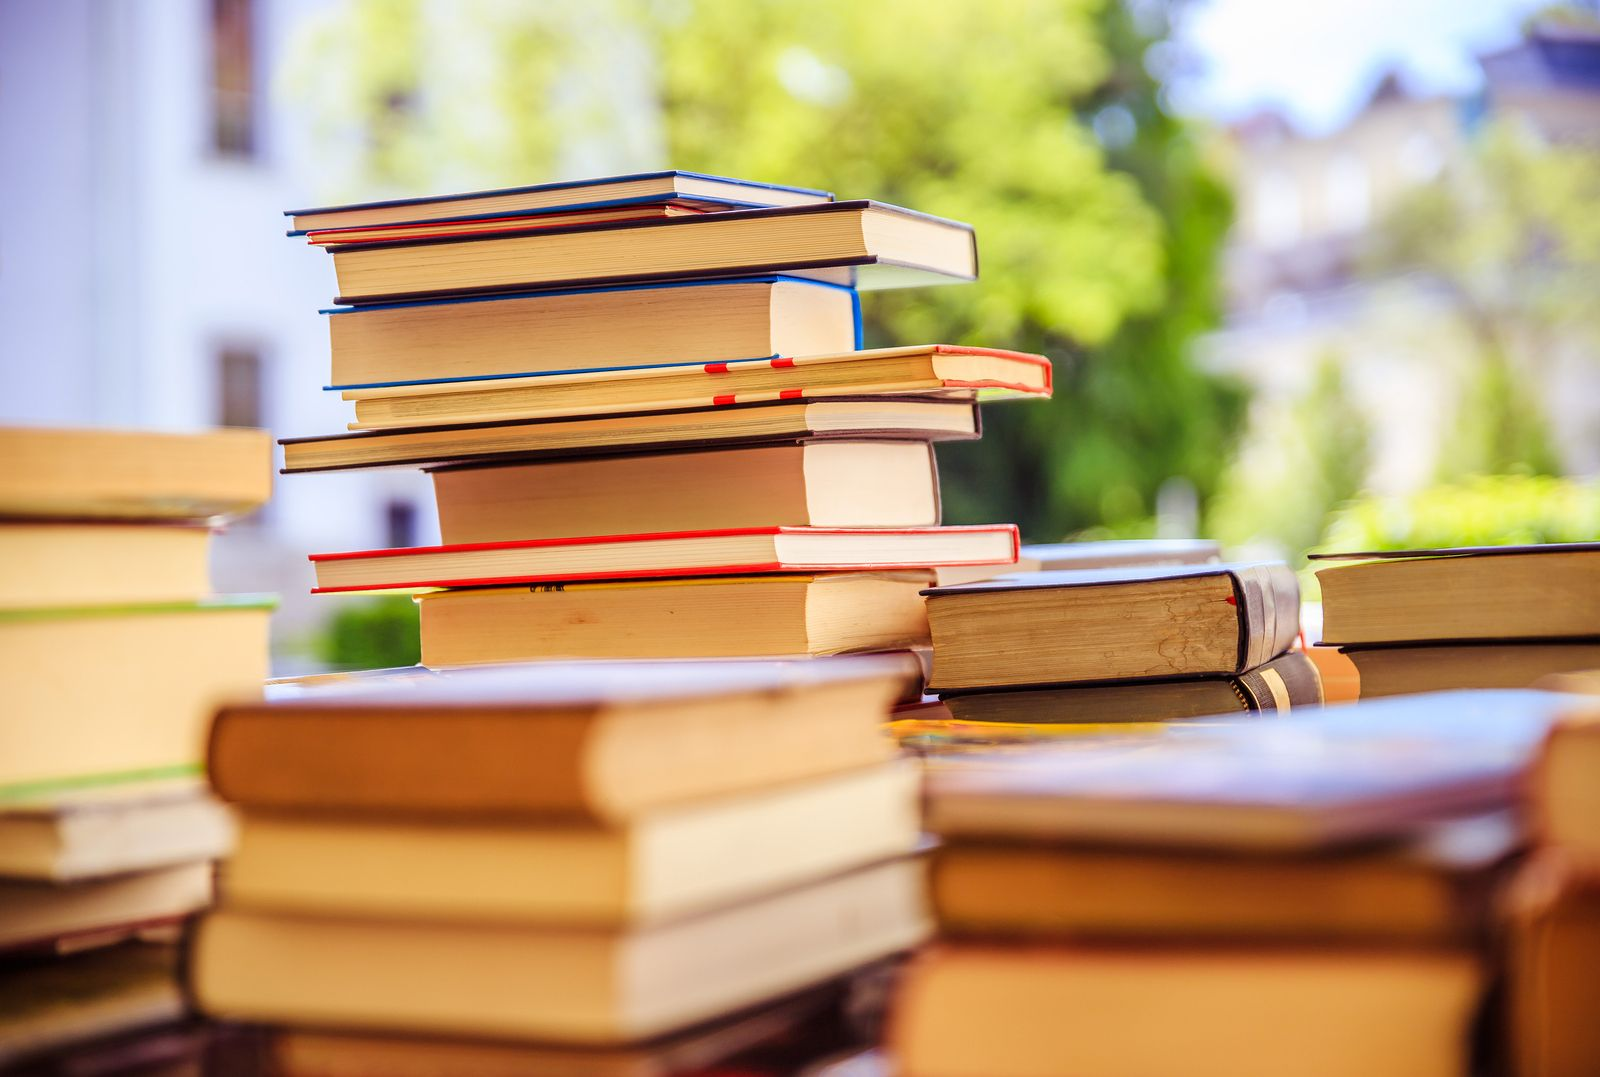
***Url de la pagina:***  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019




***Introducción general:***

Top 50 bestselling books 2009-2019 es una base de datos que consta de 50 libros más vendidos en un rango de 10 años donde podremos encontrar nombre del libro, su autor, reseñas, precios, género, entre otras. 

Con estos datos pretendemos alentar al público a darle la oportunidad a alguna historia y salir de su zona de confort, por lo que será de gran ayuda tener reseñas de personas que hayan leído aquellas historias y dado su testimonio.

Así mismo, consideramos que estos datos son útiles para el tema de creación de películas, ¿a quien no le gustaría ver en la pantalla grande su libro preferido? Por lo que con los datos recopilados podremos ver hacia qué género o autor se inclina más la gente así como saber cual es el promedio, máximo y mínimo de calificaciones, de la misma manera, podremos saber cuál es el más y menos comprado dentro de esta lista 



#**Limpieza de datos**

**Valores diferentes a cero**

Dado a que buscamos unos resultados mas precisos procederemos a hacer una limpieza identificando los valores con cero para ser posteriormente eliminados 


In [23]:
import pandas as pd
import numpy as np
import json

bdsellers = pd.read_csv("bestsellers.csv",encoding='utf8')


Analizando todas las variables, concluimos que era necesario el precio del libro debido a que los datos se recabaron por parte de una plataforma de compra online, asi mismo, consideramos que los clientes ademas de las reseñas, se guían por el precio por lo que tener un valor de 0 en precio no tiene razon de ser. Dado esto, eliminaremos las filas que contengan 0.

In [24]:
cero= bdsellers[bdsellers.Price>0]
cero

,Name,Author,Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Posterior a eliminar los datos nulos, guardaremos la base de datos con las modificaciones para continuar con la limpieza 

In [25]:
cero.to_csv('NoCeroPrice.csv')
SINCero=pd.read_csv("NoCeroPrice.csv",index_col=[0])


Asi mismo, consideramos que los años en los que se comenzaron a vender los libros no nos aprtan informacion útil además de complicar el manejo de datos puesto que hay registros de un mismo libro vendido en difentes años, es por ello que procederemos a eliminar la columna "Price"

In [26]:
Year=SINCero.drop(['Year'], axis=1)
Year

,Name,Author,Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction
...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,Non Fiction


Posteriorimente de eliminar las columnas necesarias, procederemos a crear una nueva base de datos sin los datos no deseados

In [27]:
Year.to_csv('NoYear.csv')
SINYear=pd.read_csv("NoYear.csv",index_col=[0])

Volveremos a corroborar que ya no se cuentran con datos nulos

In [28]:
print("Ceros en author  = ", np.count_nonzero(SINYear.Author== 0))
print("Ceros en name    = ",np.count_nonzero(SINYear.Name== 0))
print("Ceros en rating  = ", np.count_nonzero(SINYear.Rating == 0))
print("Ceros en reviews = ",np.count_nonzero(SINYear.Reviews== 0))
print("Ceros en price   = ",np.count_nonzero(SINYear.Price== 0))
print("Ceros en genre   = ",np.count_nonzero(SINYear.Genre== 0))

Ceros en author  =  0
Ceros en name    =  0
Ceros en rating  =  0
Ceros en reviews =  0
Ceros en price   =  0
Ceros en genre   =  0


**Eliminar columnas no deseadas**

Dado a que todas las columnas son escenciales para la informacion del top seller, no se eleminará ninguna

#**Estadística básica**

Durante este apartado trabajaremos con nuestra base de datos llamada "SINCero" 

Algunas de las preguntas de interés para esta base de datos fueron

- ¿Predomina el género de ficción? **<- este es de los que tienen mejor rating, hay que cambiarlo**


In [84]:
gen1=SINYear[SINYear.Genre=="Fiction"]
print("En la base de datos contamos con ",len(gen1)," libros de ciencia ficción")
gen=SINYear[SINYear.Genre=="Non Fiction"]
print("y ",len(gen)," libros que no pertenecen al mismo género")


En la base de datos contamos con  229  libros de ciencia ficción
y  309  libros que no pertenecen al mismo género



- ¿Cuál es el precio promedio de un bestseller?  **<- igual cambiarlo por los que tienen mejor rating***


In [83]:
df=pd.DataFrame(SINYear)
mean1= df ['Price'] .mean()
mean1= df ['Price'] .mean()
print("El precio promedio de un libro es de ",mean1)

El precio promedio de un libro es de  13.392193308550185


In [82]:
dmax=pd.DataFrame(SINYear)
mean=dmax['Price'].max()
print("El precio máximo resgistrado ha sido de ",mean)

dmin=pd.DataFrame(SINYear)
mean1=dmin['Price'].min()
print("El precio mínimo ha sido de ",mean1)

El precio máximo resgistrado ha sido de  105
El precio mínimo ha sido de  1


Podemos observar que el precio promedio es bajo tomando en cuenta que nuestro rango de precios era muy grande ya que comenzaba desde el dolar hasta las 105 dolares 


- ¿Qué libro tiene mejor rating?
- De los libros con mejor rating ¿cuál tiene mas reviews?

In [45]:
Mayor=SINYear[SINYear.Rating >= 4.9]
Mayor


,Name,Author,Rating,Reviews,Price,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,Fiction


In [46]:
Mayor.to_csv('Mayor.csv')
UPP=pd.read_csv("Mayor.csv",index_col=[0])

Como podemos apreciar, los datos aparecen repetidos debido a que exiten varios vendedores que ofrecen el mismo libro y cumplen con la condicion de tener una calificacion mayor a 4.9  por lo que para facilitar el análisis procederemos a agruparlos.


In [47]:
df=pd.DataFrame(UPP)
unico=df.drop_duplicates(['Name'])
unico

,Name,Author,Rating,Reviews,Price,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,Non Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,Fiction


In [48]:
len(unico)

27

Posteriorimente a eliminar los datos repetidos, volveremos a guardar una base de datos nueva con las modificas recientes hechas 

In [49]:
unico.to_csv('SINRep.csv')
SINRep=pd.read_csv("SINRep.csv",index_col=[0])


### **PRICE**

A continuación calcularemos cual es el  promedio , maximo , varianz  y el rango del precio de la base de datos nueva


In [181]:
SINRep['Price'] .describe()

count    27.000000
mean     13.444444
std      10.966148
min       4.000000
25%       6.500000
50%       8.000000
75%      17.500000
max      54.000000
Name: Price, dtype: float64

In [61]:
Rangop=SINRep['Price'].max()-SINRep['Price'].min()
Rangop

50

In [85]:
SINRep ['Price'] .var()


120.25641025641029

Media

El precio de los libros  es de 13.44.

Mediana

El 50% de los libros vendidos tiene un precio menor o igual a 8.

Medidas de dispersión

Varianza

La varianza del precio de los libros vendidos con respecto a la media es de 120.25.

Desviación estándar

La desviación del precio de los libros  con respecto a la media es de 10.96.







### **REVIEWS**

A continuación calcularemos cual es el  promedio ,el mximo , la varianza y  el rango de los reviews de la base de datos nueva

In [70]:
SINRep [ 'Reviews'] .describe() 

count       27.000000
mean      9213.518519
std       5458.844597
min       2812.000000
25%       5433.000000
50%       7758.000000
75%      10966.500000
max      21834.000000
Name: Reviews, dtype: float64

In [71]:
Rangor=SINRep['Reviews'].max()-SINRep['Reviews'].min()
Rangor

19022

In [86]:
SINRep ['Reviews'].var()

29798984.336182334

Media

El promedio de reviews de los libros  es de 9213.51.

Mediana

El 50% de los libros vendios tienen 77758 reviews.

Medidas de dispersión

Varianza

La varianza del los reviews de los libros vendidos con respecto a la media es de 29798984.336182334

Desviación estándar

La desviación delos reviews de los libros  con respecto a la media es de 5458.844597.

**Correlación**

In [179]:
SINRep.corr()

,Rating,Reviews,Price
Rating,1.000000e+00,-5.030613e-17,-9.781997e-17
Reviews,-5.030613e-17,1.000000e+00,-1.880664e-01
Price,-9.781997e-17,-1.880664e-01,1.000000e+00



### **Gráficas**

 **Graficas de datos univariantes**

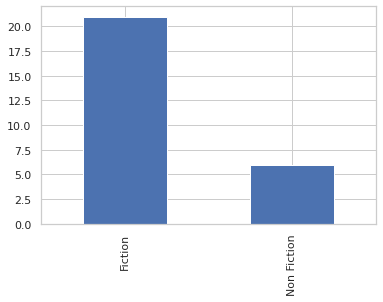

In [182]:

SINRep['Genre'].value_counts().sort_index().plot.bar()


Graficando la variable Genre, cuyos posibles resultados son Fiction y No fiction , concluimos que hay mas libros de ficcion.

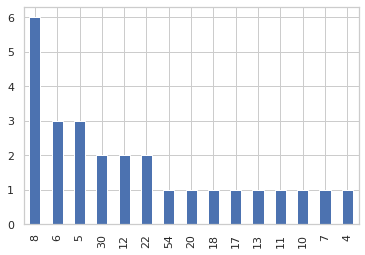

In [183]:
SINRep['Price'].value_counts().plot.bar()

Graficando la variable Price, observamos que lo más común es que sea 8.

In [109]:
Rango=SINRep ['Reviews'].max()-SINRep['Reviews'].min()

In [111]:
dat = SINRep ['Reviews']

freq = 1000     
infer= datos.min()        
dif = (datos.min() - datos.max()) % freq or freq
superi = datos.max() + dif 

intervals = pd.interval_range(
    start=inf,
    end=sup,
    freq=freq,
    name="Intervalo",
    closed="left"
    )

d = pd.DataFrame(index=intervals)
d["Frecuencia absoluta"] = pd.cut(datos, bins=df.index).value_counts()
print(d)

                Frecuencia absoluta
Intervalo                          
[2812, 3812)                      3
[3812, 4812)                      2
[4812, 5812)                      3
[5812, 6812)                      2
[6812, 7812)                      4
[7812, 8812)                      1
[8812, 9812)                      4
[9812, 10812)                     1
[10812, 11812)                    0
[11812, 12812)                    2
[12812, 13812)                    0
[13812, 14812)                    1
[14812, 15812)                    0
[15812, 16812)                    0
[16812, 17812)                    0
[17812, 18812)                    0
[18812, 19812)                    3
[19812, 20812)                    0
[20812, 21812)                    0
[21812, 22812)                    1


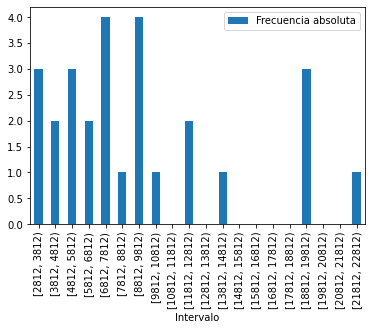

In [112]:
d.plot.bar()

Graficando la variable Reviewa, podemos observar que la mayoria de nuestra pn entra dentro del rango de e [8812,9812) y [6812,7812) criticas.

**Gráfica de lineas**

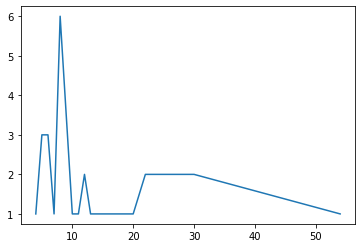

In [119]:
SINRep['Price'].value_counts().sort_index().plot.line()

Graficando la variable Price, observamos que el precio drece drásticamente a partir del  6.

**Histograma**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d890e8990>,
      dtype=object)

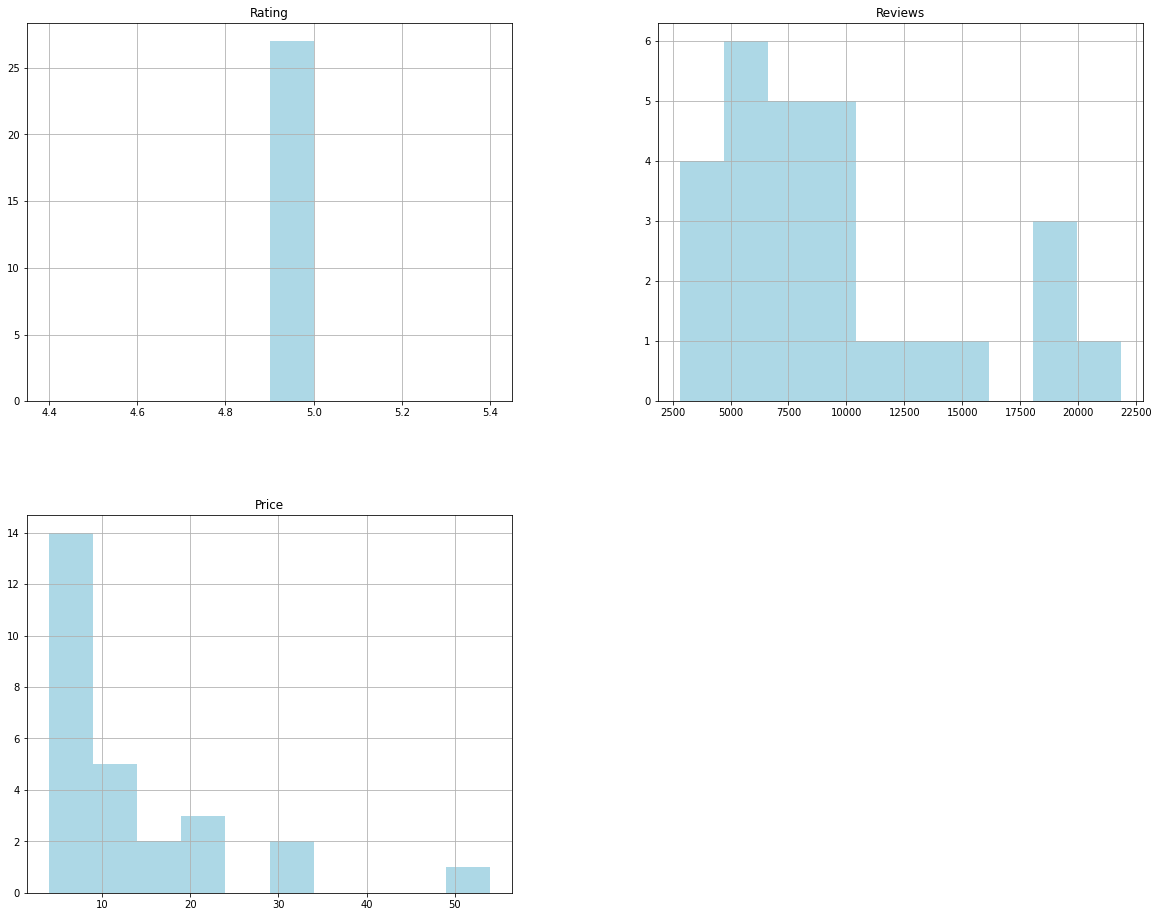

In [123]:
SINRep.hist(figsize=(20, 16),color='lightblue')

**Hexplot**

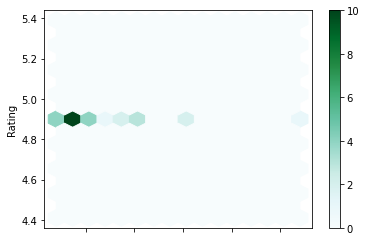

In [138]:
SINRep[SINRep['Price'] < 100].plot.hexbin(x='Price', y='Rating', gridsize=15)

Graficando la variable Price y Rating , podemos darnos cuenta que la existe una concentración en el número 4.9.

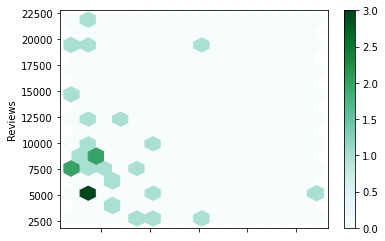

In [139]:
SINRep[SINRep['Price'] < 100].plot.hexbin(x='Price', y='Reviews', gridsize=15)

Graficando la variable Price y Reseñas , podemos darnos cuenta que la existe una concentración en el número 5000.

**Stacked plot**

In [140]:
SINRep.head()

,Name,Author,Rating,Reviews,Price,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,Fiction


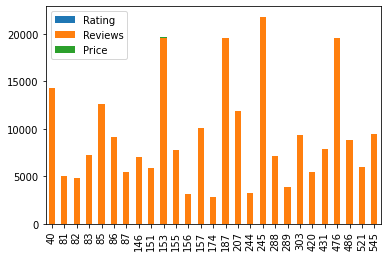

In [142]:
SINRep.plot.bar(stacked=True)

**Kernel Density Estimate "KDE"**

In [145]:
import seaborn as sns

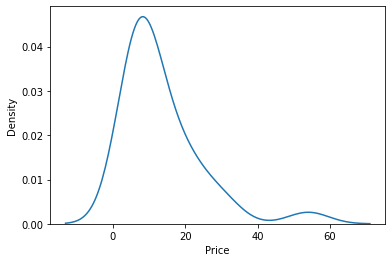

In [146]:
sns.kdeplot(SINRep['Price'])

La gráfica de Kernel density estimate muestra una curva de densidad de probabilidad de la variable del Precio. Además, que uno de nuestros objetivos, es visualizar la distribución de los datos, por lo que es de gran utilidad la gráfica KDE.

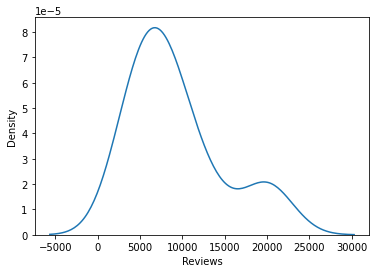

In [147]:
sns.kdeplot(SINRep['Reviews'])

La gráfica de Kernel density estimate muestra una curva de densidad de probabilidad de la variable de las reseñas. Además, que uno de nuestros objetivos, es visualizar la distribución de los datos, por lo que es de gran utilidad la gráfica KDE.

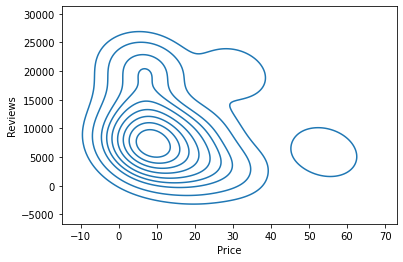

In [149]:
sns.kdeplot(data=SINRep, x="Price", y="Reviews")

Graficando la variable Precio y Reseaña , podemos darnos cuenta que se concentra en x=10 y y=5000

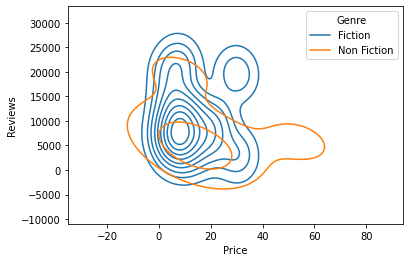

In [150]:
sns.kdeplot(data=SINRep, x="Price", y="Reviews",hue='Genre')

Graficando la variable Precio y Reseñas ,la gráfica se empalma con la naranja y no es significante para nosotros.

**Jointplot**

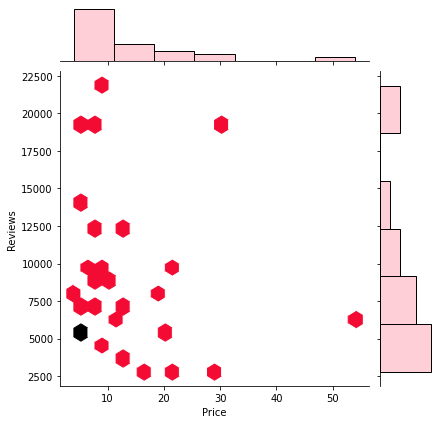

In [152]:
sns.jointplot(x='Price', y='Reviews', data=SINRep, kind='hex', 
              gridsize=20, color='pink')


Podemos observar la concentración de los datos de la variable Precio y Reseañas.

**Box plots**

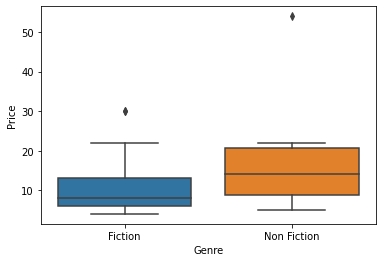

In [153]:
sns.boxplot(x='Genre', y='Price', data=SINRep)


La gráfica muestra que los preciosson diferentes dependiendo el tipo de genero. 

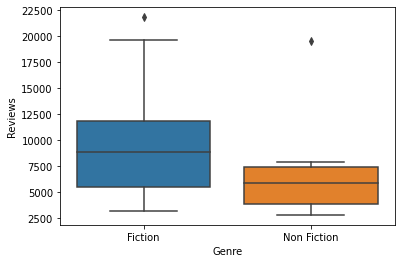

In [154]:
sns.boxplot(x='Genre', y='Reviews', data=SINRep)

La gráfica muestra que el numero de reseñas son diferentes dependiendo el tipo de genero.

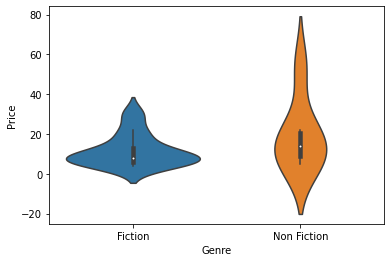

In [155]:
sns.violinplot(x='Genre', y='Price', data=SINRep)


La gráfica de violines nois permite observar que en los libros vendidos de ficcion hay una cantidad de precios entre 0 y 40, mientras que en los de no ficcion esta entre 0 y 80.

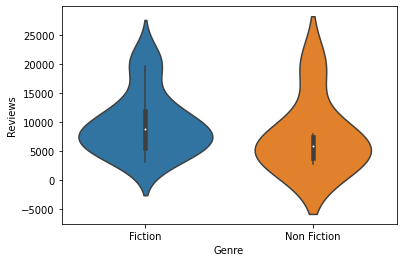

In [156]:
sns.violinplot(x='Genre', y='Reviews', data=SINRep)

La gráfica de violines nois permite observar que hay una cantidad de reseñas  entre 0 y 2500 en los de ficcion , mientras que en los de no ficcion esta entre -5000 y 2600.

**Pairplot**

In [169]:
import pandas as pd
import pandas_profiling


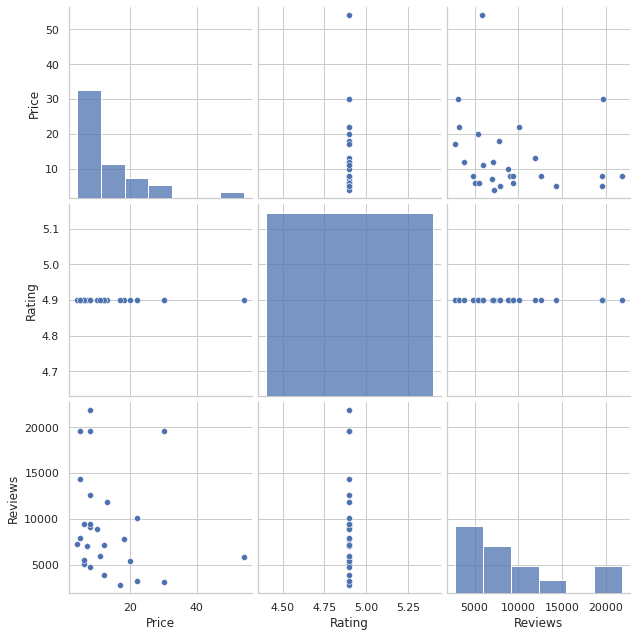

In [185]:
sns.pairplot(data=SINRep[['Price' ,'Rating','Reviews']], height=3)

## **Graficas multi variantes**

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

**lmplot**

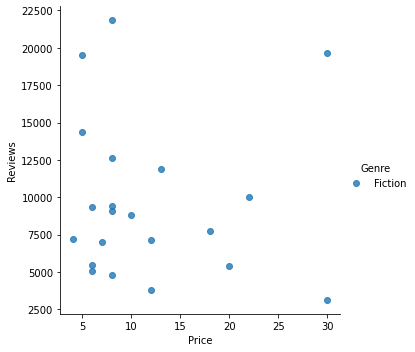

In [174]:
sns.lmplot(x='Price', y='Reviews', hue='Genre', data=SINRep.loc[SINRep['Genre'].isin(['Fiction', 'No Fiction'])], fit_reg=False)

**histplot**

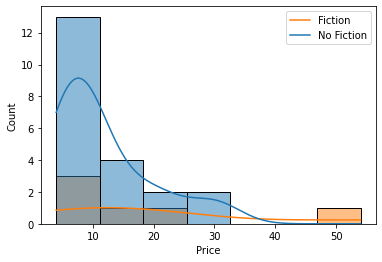

In [175]:
sns.histplot(data=SINRep, x="Price", hue = "Genre", kde=True)
plt.legend(['Fiction','No Fiction']) 
plt.show()

**Boxplot**

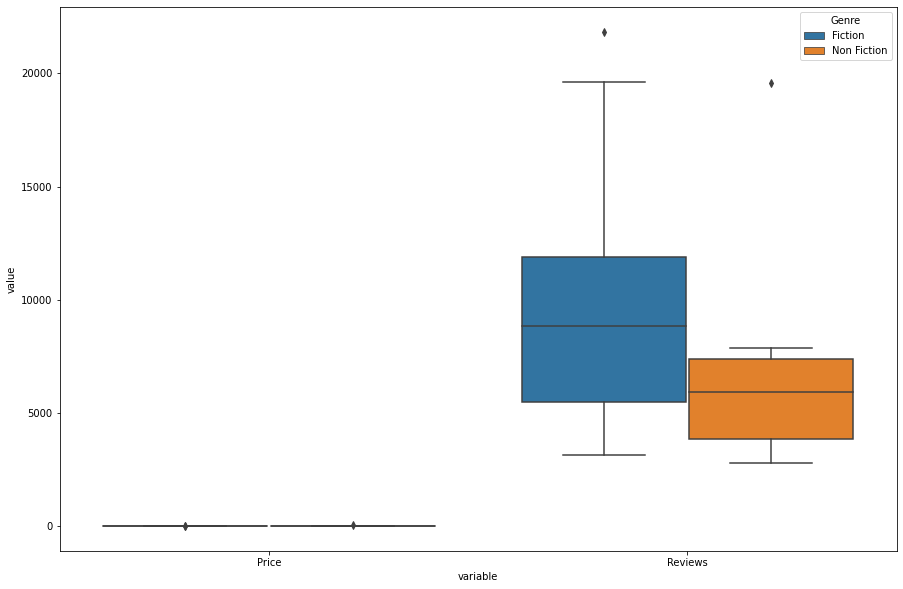

In [177]:
aux = pd.melt(SINRep,id_vars = "Genre",value_vars = ['Price', 'Reviews'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="Genre",data= aux)
plt.show()

**Mapa de calor**

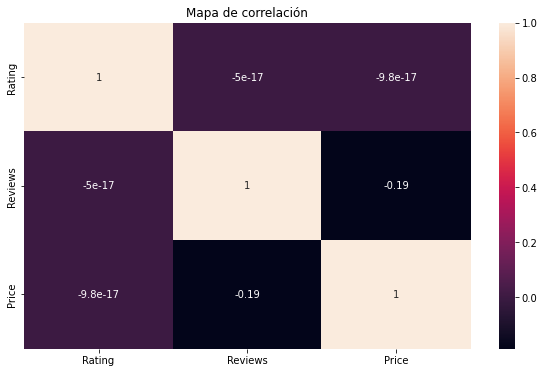

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(SINRep.corr(),annot=True)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()


## **Puntos extra**

**Gráfico de pastel de la libreria seaborn**

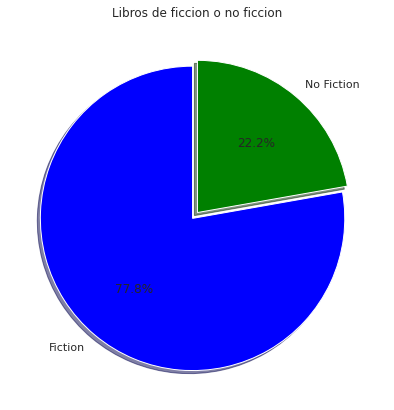

In [180]:
sns.set(style="whitegrid")
labels = ['Fiction', 'No Fiction']
sizes = SINRep['Genre'].value_counts(sort = True)
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=["blue","green"], autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Libros de ficcion o no ficcion')
plt.show()
